## Beamprofile (Figure 8)

We are studying the average X-ray beam profile in the focus.

In [14]:
# Import modules
import sys, h5py
import numpy as np
%matplotlib inline

# Import modules from src directory
sys.path.append("../src")
import plotting

In [15]:
# Physical constants
h = 6.62606957e-34 #Js
c = 299792458 #m/s
hc = h*c  #Jm

### 1. Loading data from file

In [16]:
# Load size/intensity distribution
results_file = '../analysis/results/results.h5'
with h5py.File(results_file, 'r') as f:
    diameter  = f['diameter'][:]
    intensity = f['intensity'][:]

### 2. Invert intensity data to get beam profile

In [17]:
# Select size/intensity range
size_min, size_max = (35,300)
intensity_min, intensity_max = (0,3)
intensity_profile   = intensity[(diameter > size_min) & (diameter < size_max) & (intensity > intensity_min) & (intensity < intensity_max)]
diameter_profile    = diameter[(diameter > size_min) & (diameter < size_max) & (intensity > intensity_min) & (intensity < intensity_max)]
#intensity_detection = ((intensity_min / 1000.) * args.w*1e-9) / (hc) * (np.pi*(1e-3*np.sort(diameter) / 2.)**2)

In [18]:
# Model for beam profile
s = np.argsort(intensity_profile)[::-1]
pintensity = intensity_profile[s]
pdiameter  = diameter_profile[s]
rdist   = lambda E: np.sqrt((float(E) / np.sum(intensity_profile) / np.pi)*np.arange(0,intensity_profile.shape[0]+1))

In [19]:
# Data inversion to get average beam profile
def get_profile(E):
    r = rdist(E)
    fwhm= r[np.argmin(np.abs(pintensity - (pintensity[0]/2)))]*2 * 1000.
    xrecon = np.hstack([-r[:-1][::-1],r[:-1]])
    precon = np.hstack([pintensity[::-1], pintensity])
    return xrecon, precon, fwhm

In [20]:
# Get profile
Ebefore = 1
transmission = 1
xprof, yprof, fwhm = get_profile(Ebefore*transmission)

In [21]:
# Rescale intensity
wavelength = 0.2262 #nm
yprof = ((yprof / 1000.) * wavelength*1e-9) / (hc)  * 1e-12
pintensity = ((pintensity / 1000.) * wavelength*1e-9) / (hc)  * 1e-12
intensity_scaled = ((intensity / 1000.) * wavelength*1e-9) / (hc)  * 1e-12

In [22]:
# Mirror the profile
xmirrored = np.hstack([-rdist(Ebefore*transmission)[:-1],rdist(Ebefore*transmission)[:-1]])
ymirrored = np.hstack([pintensity, pintensity])

In [23]:
hist,edges = np.histogram(intensity_scaled, range=(0,2.5), bins=250)

### 3. Plotting

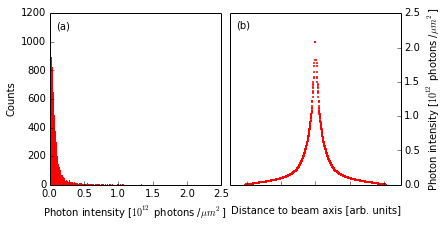

In [24]:
# Plotting the beam profile
plot = plotting.Plot(rows=1, cols=2, aspect=1, fontsize=10, legend=False, save_pdf=True)
plot.xlabel = [r'Photon intensity [$10^{12}$ photons /$\mu m^2$]', r'Distance to beam axis [arb. units]']
plot.ylabel = [r'Counts', r'Photon intensity [$10^{12}$ photons /$\mu m^2$]']
plot.title_label = ['', '']
plot.plotting_a_histogram(0, hist, edges, type='bar', color='r')
plot.plotting_traces(1, [xmirrored], [ymirrored],
                        [''],
                        colors=['r'], mecs=['r'], mfcs=['r'], linestyles=['None'],
                        linewidths=[0], markers=['.'], markersize=3, logy=False,
                        ylim=[0,2.5], xlim=[-2.5, 2.5])
#plot.axes[1].set_xticks([])
plot.axes[1].set_xticklabels([])
plot.axes[1].tick_params(axis='y', which='both', right='on', left='off', labelright='on', labelleft='off')
plot.axes[1].tick_params(axis='x', which='both', bottom='on', top='off', labelbottom='on', labeltop='off')
plot.axes[1].yaxis.set_label_position("right")
plot.axes[1].xaxis.labelpad = 16
plot.axes[0].text(0.1,1150, '(a)', va='top', ha='left', fontsize=10, color='k')
plot.axes[1].text(-2.3,2.4, '(b)', va='top', ha='left', fontsize=10, color='k')
#plot.save('/Users/benedikt/phd-project/documentation/manuscripts/omrv-paper/manuscript/figures/fig_beam_profile.pdf')
plot.show()

**Figure 8.**
(a) Histogram of estimated intensities. 1 bin equals $10^{11}$ photons / $\mu$m$^2$.                                                                                      
(b) Reconstruction of the average X-ray beam profile in the focus based on resorting the estimated photon intensities.                                                             
The injected particles are assumed to uniformly sample the averaged beam profile.